<a href="https://colab.research.google.com/github/hector6921/langchain-learning/blob/main/conditional-edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 15.2 MB/s eta 0:00:00


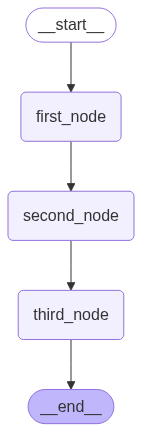

{'name': 'nila', 'age': 20, 'skills': ['python', 'react', 'flask'], 'final': 'Hi nila, welcome to the system! You are 20 years old You have skills in: python, react and flask'}


In [15]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


class AgentState(TypedDict):
  name: str
  age: str
  skills: List[str]
  final: str

def first_node(state: AgentState) -> AgentState:
  """Node 1 name"""
  state["final"] = f"Hi {state['name']}, welcome to the system! "
  return state
def second_node(state: AgentState) -> AgentState:
  """Node 2 name"""
  state["final"] += f"You are {state['age']} years old "
  return state
def third_node(state: AgentState) -> AgentState:
  """Node 3 name"""
  state["final"] += f"You have skills in: {', '.join(skill for skill in state['skills'][0:-1])} and {state['skills'][-1]}"
  return state

graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")
app = graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))
result = app.invoke({"name": "nila", "age": 20, "skills": ['python','react', 'flask']})
print(result)

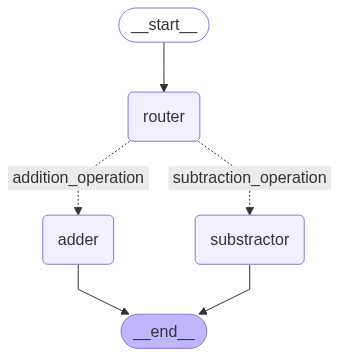

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


In [20]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  finalNumber: int
def adder(state: AgentState) -> AgentState:
  """this node adds the two numbers"""
  state["finalNumber"] = state["number1"] + state["number2"]
  return state
def substractor(state: AgentState) -> AgentState:
  """this node subtracts the two numbers"""
  state["finalNumber"] = state["number1"] - state["number2"]
  return state
def decide_next_node(state: AgentState) -> AgentState:
  """this node will select the next node of the graph"""
  if state["operation"] == "+":
    return "addition_operation"
  elif state["operation"] == "-":
    return "subtraction_operation"

graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("substractor", substractor)
graph.add_node("router", lambda state: state)
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge: node
        "addition_operation": "adder",
        "subtraction_operation": "substractor",
    }
)
graph.add_edge("adder", END)
graph.add_edge("substractor", END)

app = graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))
result = app.invoke({"number1": 10, "number2": 5, "operation": "-"})
print(result)